# Indice

## Tabla de Contenidos
2. [Introducción](#introduccion)
3. [Objetivos](#objetivos)
4. [Librerías](#librerias)
5. [Datos](#datos)
6. [Conociendo los datos](#conociendo-los-datos)
7. [Preparanción de los datos](#preparacion-de-los-datos)
    1. [Nombre de columnas](#nombre-de-columnas)
    2. [Valores no numéricos](#valores-no-numericos)
    3. [Columnas rownumber y customerid](#columnas-rownumber-y-costumerid)
    4. [Columna tenure](#columna-tenure)
    5. [Separación de datos](#separacion-de-datos)
8. [Modelos originales, sin balance](#modelos-originales-sin-balance)
    1. [Árbol de decisión](#arbol-de-decision)
    2. [Bosque aleatorio](#bosque-aleatorio)
    3. [Regresión logística](#regresion-logistica)
9. [Modelos balanceados](#modelos-balanceados)
   1. [Balanceo](#balanceo)
   2. [Árbol de decisión](#arbol-de-decision2)
       1. [Class_weight = 'balanced'](#class_weight_balanced1)
       2. [Cambio de umbral](#cambio-de-umbral1)
   3. [Bosque aleatorio](#bosque-aleatorio2)
       1. [Class_weight = 'balanced'](#class_weight_balanced2)
       2. [Class_weight = 'balanced_subsample'](#class_weight_balanced_subsample)
       3. [Cambio de umbral](#cambio-de-umbral2)
   4. [Regresión Logística](#regresion-logistica2)
       1. [Class_weight = 'balanced'](#class_weight_balanced3)
       2. [Cambio de umbral](#cambio-de-umbral3)
10. [Testeo de mejores modelos](#testeo-mejores-modelos)
11. [Conclusión](#conclusion)

<a id="introduccion"></a>
## Introducción

En Beta Bank, se ha observado una constante disminución en la retención de sus clientes, mes tras mes. Los expertos en banca han identificado que resulta más rentable retener a los clientes existentes que invertir en la adquisición de nuevos.

Por lo tanto, es crucial que podamos anticipar si un cliente tiene la probabilidad de abandonar el banco en un futuro cercano. Para lograrlo, contamos con valiosa información que abarca el historial de comportamiento de los clientes y sus registros de terminación de contratos con nuestra entidad bancaria.

<a id="objetivos"></a>
## Objetivos

1. Crear un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitamos un valor F1 de al menos 0.59. Verificar F1 para el conjunto de prueba.


2. Medir la métrica AUC-ROC y compararla con el valor F1. Explicar.

<a id="librerias"></a>
## Librerías

In [1]:
# Cargamos las librerias que nos servirán para nuestro análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

<a id="datos"></a>
## Datos

In [3]:
# Cargamos los datos de cada tabla por separado

try:
    df = pd.read_csv('C:/Users/Alejandro/Downloads/Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

<a id="conociendo-los-datos"></a>
## Conociendo los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Aprovechemos que este DataFrame se compone casi exclusivamente por números y describamoslo estadísticamente.

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Verificamos duplicados
duplicates = df[df.duplicated()]
print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 0


In [8]:
# Verificamos datos ausentes
duplicates = df[df.duplicated()]
print("Número de filas duplicadas:", len(duplicates))

Número de filas duplicadas: 0


<a id="preparacion-de-los-datos"></a>
## Preparación de los datos

<a id="nombre-de-columnas"></a>
### Nombre de columnas

Antes de dividir los datos, dejemos los nombres de las columnas en minúsculas. Esto nos podría ahorrar problemas en el futuro.

In [9]:
new_columns = []
for column in df.columns:
    new_columns.append(column.lower())
df.columns = new_columns

print(df.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


<a id="valores-no-numericos"></a>
### Valores no numéricos

Cómo en este proyecto usaremos la regresión lógica y esta solo toma valores numéricos, transformaremos las 3 columnas con str como datos. Estas columnas son:

- Surname
- Geography
- Gender

Para esto usaremos el método get_dummies, pero primero veremos cuantos valores diferentes tenemos en cada una de estas columnas.

In [10]:
print('Surname diferentes:', df['surname'].nunique())
print('Geography diferentes:', df['geography'].nunique())
print('Gender diferentes:', df['gender'].nunique())

Surname diferentes: 2932
Geography diferentes: 3
Gender diferentes: 2


Dado el amplio número de apellidos distintos en nuestro conjunto de datos, y considerando que ya disponemos de la columna "customerid" para identificar de manera única a nuestros clientes, la inclusión de la columna "Surname" se vuelve redundante. Además, al analizar su contenido, hemos determinado que esta columna no aporta información relevante para nuestras predicciones.

Por lo tanto, hemos tomado la decisión de eliminar esta columna de nuestros registros.

In [11]:
# Eliminamos la columna `surname`
df = df.drop('surname', axis=1)

In [12]:
# Ahora transformamos las otras 2 columnas
df = pd.get_dummies(df, columns=['geography', 'gender'])

<a id="columnas-rownumber-y-costumerid"></a>
### Columnas rownumber y costumerid

De la misma manera que eliminamos la columna surname, pues esta no aporta información útil para que nuestro modelo pueda predecir, también eliminaremos las columnas rownumber y customerid, pues sus valores solo confundirán a nuestro modelo.

In [13]:
df = df.drop(['rownumber', 'customerid'], axis=1)

<a id="columna-tenure"></a>
### Columna tenure

La columna tenure contiene algunos valores vacíos que deben ser llenados. Para esto necesitamos conocer los datos en esta columna. Apliquemos el método describe() y veamos la media y la posición de los cuartiles.

In [14]:
df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

Aprovechemos y veamos como se comporta para cada país.

In [15]:
df[df['geography_France']==1]['tenure'].describe()

count    4550.000000
mean        5.003956
std         2.891377
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [16]:
# Calculamos la media de tenure para France
median_tenure_france = df[df['geography_France'] == 1]['tenure'].median()

# Imputamos los valores faltantes
df.loc[df['geography_France'] == 1, 'tenure'] = df.loc[df['geography_France'] == 1, 'tenure'].fillna(median_tenure_france)

In [17]:
df[df['geography_Germany']==1]['tenure'].describe()

count    2293.000000
mean        4.981247
std         2.936961
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

In [18]:
# Calculamos la media de tenure para Germany
median_tenure_germany = df[df['geography_Germany'] == 1]['tenure'].median()

# Imputamos los valores faltantes
df.loc[df['geography_Germany'] == 1, 'tenure'] = df.loc[df['geography_Germany'] == 1, 'tenure'].fillna(median_tenure_germany)

In [19]:
df[df['geography_Spain']==1]['tenure'].describe()

count    2248.000000
mean        5.001779
std         2.859100
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

In [20]:
# Calculamos la media de tenure para Spain
median_tenure_spain = df[df['geography_Spain'] == 1]['tenure'].median()

# Imputamos los valores faltantes
df.loc[df['geography_Spain'] == 1, 'tenure'] = df.loc[df['geography_Spain'] == 1, 'tenure'].fillna(median_tenure_spain)

La media y mediana tienen prácticamente el mismo valor en cada caso, esto quiere decir que nos encontramos con una muestra de datos bastante pareja. De todas maneras veamos como se distribuyen en un diagrama de caja.

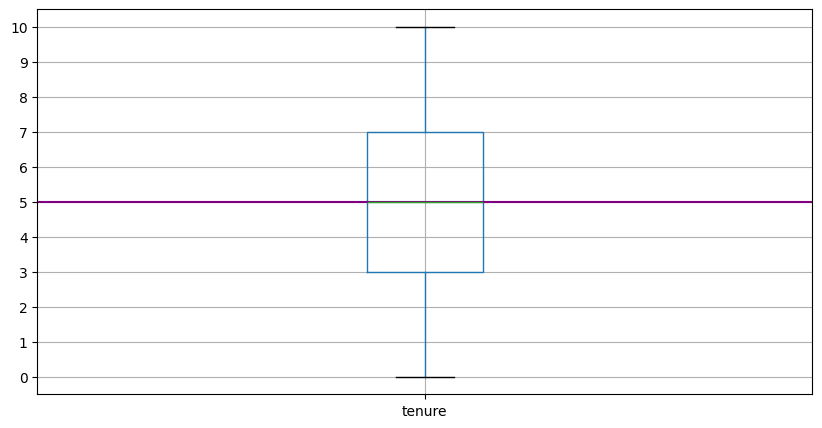

In [21]:
df.boxplot(column='tenure', figsize=(10,5))
plt.yticks(np.arange(0, 10.1, step=1))
# Marquemos la media en morado
plt.hlines(5, xmin=0.5,xmax=1.5, color='purple')
plt.show()

Aunque parece que los datos están ligeramente inclinados hacia abajo, están parejamente equilibrados. Con esto en mente podemos llenar los valores vacíos con 5, el valor de la media y mediana.

In [22]:
print(df['tenure'].describe())

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: tenure, dtype: float64


<a id="separacion-de-datos"></a>
### Separación de datos

Ahora podemos pasar al siguiente paso para preparar nuestros datos para el modelo. Para poder entrenar, validar y testear nuestro modelo necesitamos tomar 2 pasos antes. Estos son:

- Dividir los datos para tener los distintos grupos de datos, en este caso dejaremos 20% para validación y otro 20% para testeo, el resto será para entrenar.
- Crear los targets y features para nuestro modelo, considerando entrenamiento, validación y testeo, en este caso consideramos la columna final exited como el target.

In [23]:
# Primero separamos el grupo de testeo
df_rest, df_test = train_test_split(df, test_size=0.2, random_state=54321)

In [24]:
# Luego separamos en entrenamiento y validación
df_train, df_valid = train_test_split(df_rest, test_size=0.25, random_state=54321)

In [25]:
# Creamos targets y features para nuestro modelo
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

In [26]:
# Veamos los tamaños finales de nuestros DataFrames
print('Entrenamiento:')
print(features_train.shape)
print(target_train.shape)
print()
print('Validación:')
print(features_valid.shape)
print(target_valid.shape)
print()
print('Testeo:')
print(features_test.shape)
print(target_test.shape)

Entrenamiento:
(6000, 13)
(6000,)

Validación:
(2000, 13)
(2000,)

Testeo:
(2000, 13)
(2000,)


<a id="modelos-originales-sin-balance"></a>
## Modelos originales, sin balance

En una primera fase, procederemos a analizar los tres tipos de modelos de manera similar a lo realizado en un proyecto anterior. Esto implica la consideración de ciertos hiperparámetros específicos para cada modelo, sin realizar ajustes en los pesos de las clases. En cada caso, evaluaremos el valor de la métrica F1 con el objetivo de determinar cuál de los modelos se destaca como el más adecuado. Asimismo, para obtener una comprensión más completa de esta métrica, examinaremos tanto su precisión como su recall. Esta evaluación integral nos proporcionará una visión más clara sobre cómo deberíamos abordar el equilibrio de los datos en nuestro análisis.

<a id="arbol-de-decision"></a>
### Árbol de decisión

Comencemos con el arbol de decisión:

In [27]:
best_tree = 0
best_depth = 0
best_leaf = 0
score = 0
for depth in range(1, 20): # selecciona el rango del hiperparámetro
    for leaf in range(1,20):
        tree = DecisionTreeClassifier(random_state=54321, max_depth=depth, min_samples_leaf=leaf) # configura el número de árboles
        tree.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = tree.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_tree:
            best_tree = score # guarda la mejor puntuación de exactitud en el conjunto de validación
            best_depth = depth # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_leaf = leaf

print("Exactitud del mejor modelo en el conjunto de validación (depth = {}, leafs = {}): {}".format(best_depth, best_leaf, best_tree))

final_tree = DecisionTreeClassifier(random_state=54321, max_depth=best_depth, min_samples_leaf=best_leaf) # cambia n_estimators para obtener el mejor modelo
final_tree.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (depth = 11, leafs = 17): 0.6133004926108374


DecisionTreeClassifier(max_depth=11, min_samples_leaf=17, random_state=54321)

In [28]:
predict_valid = final_tree.predict(features_valid)

precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

print('Recall:', recall)
print('Precisión:', precision)

Recall: 0.5633484162895928
Precisión: 0.672972972972973


In [29]:
# Evaluamos el modelo en el conjunto de prueba
predicted_test = final_tree.predict(features_test)

test_f1 = f1_score(target_test, predicted_test)
test_precision = precision_score(target_test, predicted_test)
test_recall = recall_score(target_test, predicted_test)

print("Exactitud del modelo en el conjunto de prueba (depth = {}, leafs = {}): {}".format(best_depth, best_leaf, test_f1))
print('Recall en el conjunto de prueba:', test_recall)
print('Precisión en el conjunto de prueba:', test_precision)

Exactitud del modelo en el conjunto de prueba (depth = 11, leafs = 17): 0.596931659693166
Recall en el conjunto de prueba: 0.5487179487179488
Precisión en el conjunto de prueba: 0.654434250764526


Hemos logrado identificar el valor mínimo para la métrica F1, no obstante, anticipamos que este valor debería mejorar significativamente al aplicar el equilibrio en nuestra base de datos.

Es evidente que el valor de recall actualmente se encuentra por debajo de la precisión, lo que indica la necesidad de enfocarnos en mejorar este aspecto para lograr un incremento sustancial en el valor final de F1. Ahora, continuemos nuestra exploración del bosque aleatorio para determinar si observamos una dinámica similar.

<a id="bosque-aleatorio"></a>
### Bosque aleatorio

Adentremonos en el bosque:

In [30]:
best_forest = 0
best_est = 0
score=0
best_depth = 0
for est in range(1, 10): # selecciona el rango del hiperparámetro
    for depth in range(1, 10): # selecciona el rango del hiperparámetro
        forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) # configura el número de árboles
        forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = forest.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_forest:
            best_forest = score # guarda la mejor puntuación de exactitud en el conjunto de validación
            best_est = est # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, best_forest))

final_forest = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth) # cambia n_estimators para obtener el mejor modelo
final_forest.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (n_estimators = 4, depth = 9): 0.5710306406685237


RandomForestClassifier(max_depth=9, n_estimators=4, random_state=54321)

In [31]:
predict_valid = final_forest.predict(features_valid)

precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

print('Recall:', recall)
print('Precisión:', precision)

Recall: 0.4638009049773756
Precisión: 0.7427536231884058


In [32]:
# Evaluamos el modelo en el conjunto de prueba
predicted_test = final_forest.predict(features_test)

test_f1 = f1_score(target_test, predicted_test)
test_precision = precision_score(target_test, predicted_test)
test_recall = recall_score(target_test, predicted_test)

print("Exactitud del modelo en el conjunto de prueba (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, test_f1))
print('Recall en el conjunto de prueba:', test_recall)
print('Precisión en el conjunto de prueba:', test_precision)

Exactitud del modelo en el conjunto de prueba (n_estimators = 4, depth = 9): 0.5732899022801303
Recall en el conjunto de prueba: 0.4512820512820513
Precisión en el conjunto de prueba: 0.7857142857142857


En esta instancia, no hemos alcanzado el valor mínimo requerido para la métrica F1. Para poder lograr este objetivo, es imprescindible aplicar técnicas de balanceo.

Es importante destacar que el valor de recall continúa siendo el más bajo y está por debajo de nuestras expectativas, lo que nos lleva a la conclusión de que debemos centrarnos especialmente en mejorar esta métrica para alcanzar un aumento significativo en el valor de F1.

<a id="regresion-logistica"></a>
### Regresión logística

In [33]:
reg = LogisticRegression(solver='liblinear', random_state=54321) # Creamos el modelo
reg.fit(features_train, target_train) # Lo entrenamos

predicted_valid = reg.predict(features_valid) # Realizamos predicciones desde los datos de validación
print('F1:', f1_score(target_valid, predicted_valid)) # Vemos el valor de F1 de la regresión
print('Score:', reg.score(features_valid,target_valid))
print()

precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

print('Recall:', recall)
print('Precisión:', precision)
f1 = 2*precision*recall/(precision+recall)
print('Puntuación F1 manual:', f1)

F1: 0.03956043956043956
Score: 0.7815

Recall: 0.4638009049773756
Precisión: 0.7427536231884058
Puntuación F1 manual: 0.5710306406685236


In [34]:
# Evaluamos el modelo en el conjunto de prueba
predicted_test = reg.predict(features_test)

test_f1 = f1_score(target_test, predicted_test)
test_precision = precision_score(target_test, predicted_test)
test_recall = recall_score(target_test, predicted_test)

print("Exactitud del modelo en el conjunto de prueba: {}".format(test_f1))
print('Recall en el conjunto de prueba:', test_recall)
print('Precisión en el conjunto de prueba:', test_precision)
print()

# Calculamos manualmente la puntuación F1
f1_manual = 2 * test_precision * test_recall / (test_precision + test_recall)
print('Puntuación F1 manual:', f1_manual)

Exactitud del modelo en el conjunto de prueba: 0.015151515151515152
Recall en el conjunto de prueba: 0.007692307692307693
Precisión en el conjunto de prueba: 0.5

Puntuación F1 manual: 0.015151515151515154


En este caso, contamos con un valor de F1 muy bajo, si lo calculamos manualmente este sube a niveles más aceptables, pero se mantiene bajo el mínimo necesario. Al parecer la regresión lógica no es la herramienta que necesitamos para este proyecto. Veremos si al balancear los datos esta métrica mejora.

<a id="modelos-balanceados"></a>
## Modelos balanceados

<a id="balanceo"></a>
### Balanceo

Para balancear los modelo utilizaremos 3 medidas:

- Utilizando el hiperparámetro: class_weight='balanced'.
- Utilizando el hiperparámetro: class_weight='balanced_subsample' (Para bosque aleatorio).
- Cambiando el umbral de las respuestas positivas.

En el último caso, cambio del umbral, también aprovecharemos a estudiar el valor de AUC-ROC de cada modelo. Esto lo haremos, pues esta medida usa los mismos valores de probabilidad de clase para calcularse. Dicho esto, aún no lo tomaremos en consideración, pues usaremos esta medida al momento de testear nuestros modelos. Por ahora solo estará ahí a modo informativo.

<a id="arbol-de-decision2"></a>
### Árbol de decisión

<a id="class_weight_balanced1"></a>
#### class_weight = 'balanced'

Agreguemos el hiperparámetro y veamos como cambia el valor de F1.

In [35]:
best_tree = 0
best_depth = 0
best_leaf = 0
score = 0
for depth in range(1, 10): # selecciona el rango del hiperparámetro
    for leaf in range(1,10):
        tree = DecisionTreeClassifier(random_state=54321, max_depth=depth, min_samples_leaf=leaf, class_weight='balanced') # configura el número de árboles
        tree.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = tree.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_tree:
            best_tree = score # guarda la mejor puntuación de exactitud en el conjunto de validación
            best_depth = depth # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_leaf = leaf

print("Exactitud del mejor modelo en el conjunto de validación (depth = {}, leafs = {}): {}".format(best_depth, best_leaf, best_tree))

final_balanced_tree = DecisionTreeClassifier(random_state=54321, max_depth=best_depth, min_samples_leaf=best_leaf, class_weight = 'balanced') # cambia n_estimators para obtener el mejor modelo
final_balanced_tree.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (depth = 6, leafs = 9): 0.5928571428571429


DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=9,
                       random_state=54321)

In [36]:
predict_valid = final_balanced_tree.predict(features_valid)

precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

print('Recall:', recall)
print('Precisión:', precision)

Recall: 0.751131221719457
Precisión: 0.4896755162241888


In [37]:
# Evaluamos en el conjunto de prueba
predicted_test = final_balanced_tree.predict(features_test)

test_f1 = f1_score(target_test, predicted_test)
test_precision = precision_score(target_test, predicted_test)
test_recall = recall_score(target_test, predicted_test)

print("Exactitud del modelo balanceado en el conjunto de prueba: {}".format(test_f1))
print('Recall en el conjunto de prueba:', test_recall)
print('Precisión en el conjunto de prueba:', test_precision)

Exactitud del modelo balanceado en el conjunto de prueba: 0.5873465533522191
Recall en el conjunto de prueba: 0.7974358974358975
Precisión en el conjunto de prueba: 0.4648729446935725


Sorprendentemente podemos ver que el valor de F1 ha disminuido. Si nos fijamos en mayor detalle, podemos ver que la precisión disminuyó mientras que recall aumentó. Esta vez tenemos un valor de recall marcadamente mayor a su compañero.Probaremos a continuación el cambio de umbral y sus efectos.

<a id="cambio-de-umbral1"></a>
#### Cambio de umbral

Primero probemos con el arbol de decisión sin balanceo. Aprovecharemos que este modelo tiene una rápida velocidad de procesamiento y compararemos las versiones no balanceadas y balanceadas.

In [38]:
probabilities_valid = final_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.52 | Precision = 0.689, Recall = 0.557, F1 = 0.6158
AUC-ROC: 0.8280876980001045


Podemos ver ahora un importante aumento en el valor de F1, de 0.593 a 0.616. Veamos ahora como se comporta el arbol balanceado.

<a id="bosque-aleatorio2"></a>
### Bosque aleatorio

<a id="class_weight_balanced2"></a>
#### class_weight = 'balanced'

In [39]:
best_forest = 0
best_est = 0
score=0
best_depth = 0
for est in range(1, 10): # selecciona el rango del hiperparámetro
    for depth in range(1, 10): # selecciona el rango del hiperparámetro
            forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') # configura el número de árboles
            forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
            predicted_valid = forest.predict(features_valid)
            score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
            if score > best_forest:
                best_forest = score# guarda la mejor puntuación de exactitud en el conjunto de validación
                best_est = est # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
                best_leaf = leaf
                best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, best_forest))

final_balanced_forest = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth, class_weight = 'balanced') # cambia n_estimators para obtener el mejor modelo
final_balanced_forest.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (n_estimators = 9, depth = 5): 0.6137667304015296


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=9,
                       random_state=54321)

In [40]:
predict_valid = final_balanced_forest.predict(features_valid)

precision = precision_score(target_valid, predict_valid) # <escribe el código aquí  >
recall = recall_score(target_valid, predict_valid) # < escribe el código aquí  >

print('Recall en el conjunto de validación (balanced forest):', recall)
print('Precisión en el conjunto de validación (balanced forest):', precision)

Recall en el conjunto de validación (balanced forest): 0.7262443438914027
Precisión en el conjunto de validación (balanced forest): 0.5314569536423841


In [41]:
# Evaluamos del modelo en el conjunto de prueba
predicted_test_balanced_forest = final_balanced_forest.predict(features_test)
f1_test_balanced_forest = f1_score(target_test, predicted_test_balanced_forest)
precision_test_balanced_forest = precision_score(target_test, predicted_test_balanced_forest)
recall_test_balanced_forest = recall_score(target_test, predicted_test_balanced_forest)

print('F1 en el conjunto de prueba (balanced forest):', f1_test_balanced_forest)
print('Precisión en el conjunto de prueba (balanced forest):', precision_test_balanced_forest)
print('Recall en el conjunto de prueba (balanced forest):', recall_test_balanced_forest)

F1 en el conjunto de prueba (balanced forest): 0.6075675675675676
Precisión en el conjunto de prueba (balanced forest): 0.525233644859813
Recall en el conjunto de prueba (balanced forest): 0.7205128205128205


El valor de F1 sigue aumentando, ahora nos encontramos en 0.619. Continuemos viendo si nuestros modelos pueden seguir mejorando.

<a id="class_weight_balanced_subsample"></a>
#### class_weight = 'balanced_subsample'

In [42]:
best_forest = 0
best_est = 0
score=0
best_depth = 0
for est in range(1, 10): # selecciona el rango del hiperparámetro
    for depth in range(1, 10): # selecciona el rango del hiperparámetro
        forest = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced_subsample') # configura el número de árboles
        forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predicted_valid = forest.predict(features_valid)
        score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
        if score > best_forest:
            best_forest = score# guarda la mejor puntuación de exactitud en el conjunto de validación
            best_est = est # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
            best_depth = depth

print("Exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, depth = {}): {}".format(best_est, best_depth, best_forest))

final_balanced_sub_forest = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth, class_weight='balanced_subsample') # cambia n_estimators para obtener el mejor modelo
final_balanced_sub_forest.fit(features_train, target_train)

Exactitud del mejor modelo en el conjunto de validación (n_estimators = 7, depth = 8): 0.6152304609218436


RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=7, random_state=54321)

In [43]:
predict_valid = final_balanced_sub_forest.predict(features_valid)

precision = precision_score(target_valid, predict_valid) # <escribe el código aquí  >
recall = recall_score(target_valid, predict_valid) # < escribe el código aquí  >

print('Recall en el conjunto de validación (balanced_subsample forest):', recall)
print('Precisión en el conjunto de validación (balanced_subsample forest):', precision)

Recall en el conjunto de validación (balanced_subsample forest): 0.6945701357466063
Precisión en el conjunto de validación (balanced_subsample forest): 0.552158273381295


In [44]:
# Evaluamosdel modelo en el conjunto de prueba
predicted_test_balanced_sub_forest = final_balanced_sub_forest.predict(features_test)
f1_test_balanced_sub_forest = f1_score(target_test, predicted_test_balanced_sub_forest)
precision_test_balanced_sub_forest = precision_score(target_test, predicted_test_balanced_sub_forest)
recall_test_balanced_sub_forest = recall_score(target_test, predicted_test_balanced_sub_forest)

print('F1 en el conjunto de prueba (balanced_subsample forest):', f1_test_balanced_sub_forest)
print('Precisión en el conjunto de prueba (balanced_subsample forest):', precision_test_balanced_sub_forest)
print('Recall en el conjunto de prueba (balanced_subsample forest):', recall_test_balanced_sub_forest)

F1 en el conjunto de prueba (balanced_subsample forest): 0.6024636058230683
Precisión en el conjunto de prueba (balanced_subsample forest): 0.5347912524850894
Recall en el conjunto de prueba (balanced_subsample forest): 0.6897435897435897


Continuamos con un alto valor F1, de 0.615 con este modelo. Recall aumenta, pero la precisión disminuye.

<a id="cambio-de-umbral2"></a>
### Cambio de umbral

Al igual que con el modelo de arbol de decisión, estudiaremos los efectos de cambiar el umbral para varios modelos del bosque aleatorio. Esta vez tenemos 3 versiones de este modelo:

1. Bosque sin balanceo.
2. Bosque balanceado.
3. Bosque sub-balanceado.

Compararemos los valores F1 para estos 3 modelos mientras cambiamos su umbral, buscando el mayor valor posible.

Comencemos con el bosque sin balanceo:

In [45]:
probabilities_valid = final_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.26 | Precision = 0.561, Recall = 0.676, F1 = 0.6133
AUC-ROC: 0.8411715332918988


Nuestro valor F1 disminuyó un poco, esto se debe a una significativa disminución en recall, pero también tenemos un pequeño aumento en la precisión. Nos mantenemos sobre 0.61. Podría ser un buen camino, pero debemos cambiar algo.

Continuemos con una prueba del bosque balanceado:

In [46]:
probabilities_valid = final_balanced_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.50 | Precision = 0.531, Recall = 0.726, F1 = 0.6138
AUC-ROC: 0.8463680376860925


El valor de F1 sigue aumentando, pero por primera vez contamos con un valor F1 sobre 0.62. Aunque estamos combinando métodos de balanceo, podría servir con el aumento que obtuvimos.

Continuemos con una última prueba del bosque sub-balanceado:

In [47]:
probabilities_valid = final_balanced_sub_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.50 | Precision = 0.552, Recall = 0.695, F1 = 0.6152
AUC-ROC: 0.8448018982452268


El valor de F1 aumentó un poco desde la última medición, pero sigue sin superar el valor más alto encontrado.

Podemos concluir, por ahora, que el bosque aleatorio balanceado con un umbral del 48% tiene el mayor valor F1.

<a id="regresion-logistica2"></a>
### Regresión logística

<a id="class_weight_balanced3"></a>
#### class_weight = 'balanced'

In [48]:
balanced_reg = LogisticRegression(solver='liblinear', random_state=54321, class_weight='balanced') # Creamos el modelo
balanced_reg.fit(features_train, target_train) # Lo entrenamos

predicted_valid = balanced_reg.predict(features_valid) # Realizamos predicciones desde los datos de validación
print('F1:', f1_score(target_valid, predicted_valid)) # Vemos el valor de F1 de la regresión
print()

precision = precision_score(target_valid, predict_valid)
recall = recall_score(target_valid, predict_valid)

print('Recall:', recall)
print('Precisión:', precision)
f1 = 2*precision*recall/(precision+recall)
print('Puntuación F1 manual:', f1)

F1: 0.49920255183413076

Recall: 0.6945701357466063
Precisión: 0.552158273381295
Puntuación F1 manual: 0.6152304609218436


In [49]:
predicted_test = balanced_reg.predict(features_test)  # Realizamos predicciones en los datos de prueba

f1_test = f1_score(target_test, predicted_test)  # Calculamos el valor de F1 en los datos de prueba
precision_test = precision_score(target_test, predicted_test)  # Calculamos la precisión en los datos de prueba
recall_test = recall_score(target_test, predicted_test)  # Calculamos el recall en los datos de prueba

print('Evaluación en datos de testeo:')
print('F1:', f1_test)
print('Precisión:', precision_test)
print('Recall:', recall_test)

Evaluación en datos de testeo:
F1: 0.46457399103139013
Precisión: 0.35724137931034483
Recall: 0.6641025641025641


<a id="cambio-de-umbral3"></a>
### Cambio de umbral

In [50]:
probabilities_valid = reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
score = 0
best_precision = 0
best_recall = 0
best_score = 0

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    score = f1_score(target_valid, predicted_valid) # calcula la puntuación de exactitud en el conjunto de validación
    if score > best_score:
        best_score = score
        best_treshold = threshold # guarda la mejor puntuación de exactitud en el conjunto de validación
        best_precision = precision_score(target_valid, predicted_valid) # guarda el número de estimadores que corresponden a la mejor puntuación de exactitud
        best_recall = recall_score(target_valid,predicted_valid)

print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.4f}'.format(best_treshold,best_precision,best_recall,best_score))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Threshold = 0.22 | Precision = 0.329, Recall = 0.600, F1 = 0.4250
AUC-ROC: 0.669034148664897


Este método no ha logrado aportarnos las métricas que necesitamos. Sus resultados no son lo suficientemente buenos como para llevarlos a la siguiente sección.

<a id="testeo-mejores-modelos"></a>
## Testeo de mejores modelos

Ahora que hemos probado varios modelos y tenemos más información sobre estos, comencemos testeandolos. Para esto consideraremos los 2 modelos con mayor valor F1. Estos son:

1. final_balanced_forest con F1=0.619
2. final_balanced_sub_forest en umbral del 48% con F1=0.621

Testearemos solo el primero de estos modelos, siguiendo los límites del proyecto, con el conjunto de datos de testeo y veremos como se comportan. Esta vez entrenaremos al modelo usando los subconjuntos de entrenamiento y validación.

Primero creemos los target y features basados en df_rest.

In [51]:
features_rest = df_rest.drop(['exited'], axis=1)
target_rest = df_rest['exited']

Ahora comencemos con el testeo del modelo:

In [52]:
final_balanced_forest = RandomForestClassifier(random_state=54321, n_estimators=9, max_depth=9, class_weight='balanced') # cambia n_estimators para obtener el mejor modelo
final_balanced_forest.fit(features_rest, target_rest)

# Evaluamos el modelo con los datos de prueba (features_test y target_test)
score = final_balanced_forest.score(features_test, target_test)
print('Puntaje del modelo:', score)

predicted_test = final_balanced_forest.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print('F1:', f1)

probabilities_test = final_balanced_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:', auc_roc)

Puntaje del modelo: 0.8355
F1: 0.6078665077473182
AUC-ROC: 0.8672686733556298


In [53]:
# Creamos una tabla con los resultados
tabla_resultados = {
    'Modelo': ['final_balanced_forest'],
    'Puntaje en Testeo': [score],
    'F1 en Testeo': [f1],
    'AUC-ROC en Testeo': [auc_roc]
}

# Imprimir la tabla de resultados
df_resultados = pd.DataFrame(tabla_resultados)
df_resultados = df_resultados.sort_values(by='F1 en Testeo', ascending=False)
print(df_resultados)

                  Modelo  Puntaje en Testeo  F1 en Testeo  AUC-ROC en Testeo
0  final_balanced_forest             0.8355      0.607867           0.867269


<a id="conslusion-general"></a>
## Conclusión general

Aunque el valor final de F1 disminuyó un poco, este se encuentra cómodamente sobre el mínimo necesario. Además, es de esperar una pequeña disminución al testear.

Nuestro modelo final es : RandomForestClassifier(max_depth=9, n_estimators=9, class_weight='balanced', random_state=54321)

Los valores de las métricas finales son:

1. Puntaje del modelo: 0.8285
2. F1: 0.6088939566704674
3. AUC-ROC: 0.8672041726389553